# WEEK 2 - LAB

# EDA and Visualization

In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required


In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request


In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

### LOAD DATA

In [5]:
def load_brain_stroke_data(dataset_path="Datasets/"):
    csv_path = os.path.join(dataset_path, "brain_stroke.csv")
    return pd.read_csv(csv_path)

In [6]:
brain = load_brain_stroke_data() # "brain" is a pandas DataFrame object containing all the data
brain.head() # Display the top five rows of the DataFrame

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [7]:
brain.shape # get number of instances (rows) and number of attributes (columns)

(4981, 11)

In [8]:
brain.info()    # info on amount of columns and non null count of each column

# No missing values in any column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [9]:
brain["stroke"].value_counts() # 4733 records of people with no strokes, 248 records of people who have had a stroke 

0    4733
1     248
Name: stroke, dtype: int64

In [10]:
brain.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


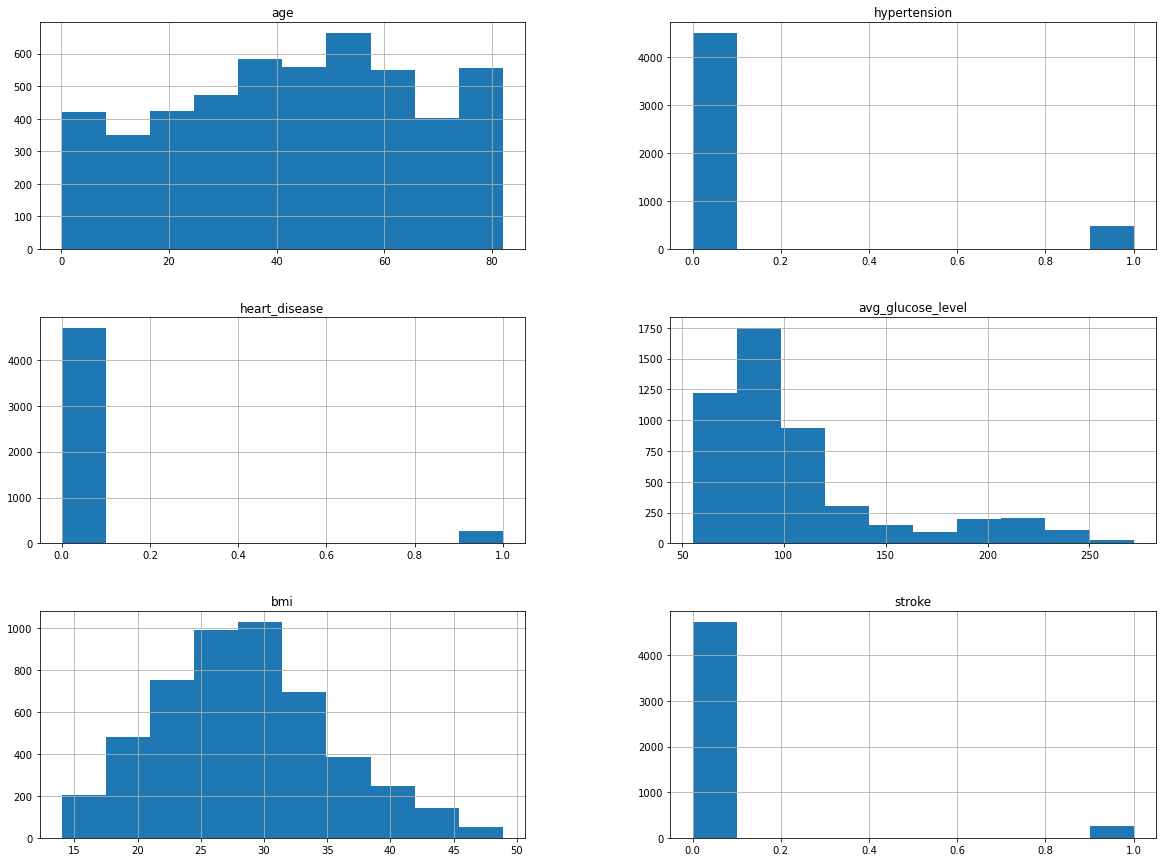

In [11]:
brain.hist(bins=10, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='age', ylabel='stroke'>

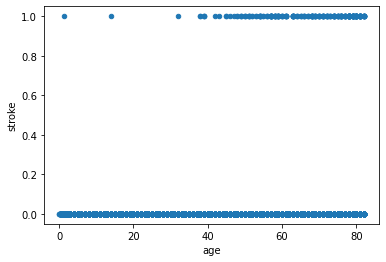

In [12]:
brain.plot(kind="scatter", x="age", y="stroke")

In [13]:
corr_matrix = brain.corr()

In [14]:
corr_matrix["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.246478
heart_disease        0.134610
avg_glucose_level    0.133227
hypertension         0.131965
bmi                  0.056926
Name: stroke, dtype: float64

array([[<AxesSubplot:xlabel='stroke', ylabel='stroke'>,
        <AxesSubplot:xlabel='age', ylabel='stroke'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='stroke'>,
        <AxesSubplot:xlabel='bmi', ylabel='stroke'>],
       [<AxesSubplot:xlabel='stroke', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>],
       [<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>,
        <AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='avg_glucose_level'>,
        <AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>],
       [<AxesSubplot:xlabel='stroke', ylabel='bmi'>,
        <AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>]], dtype=object)

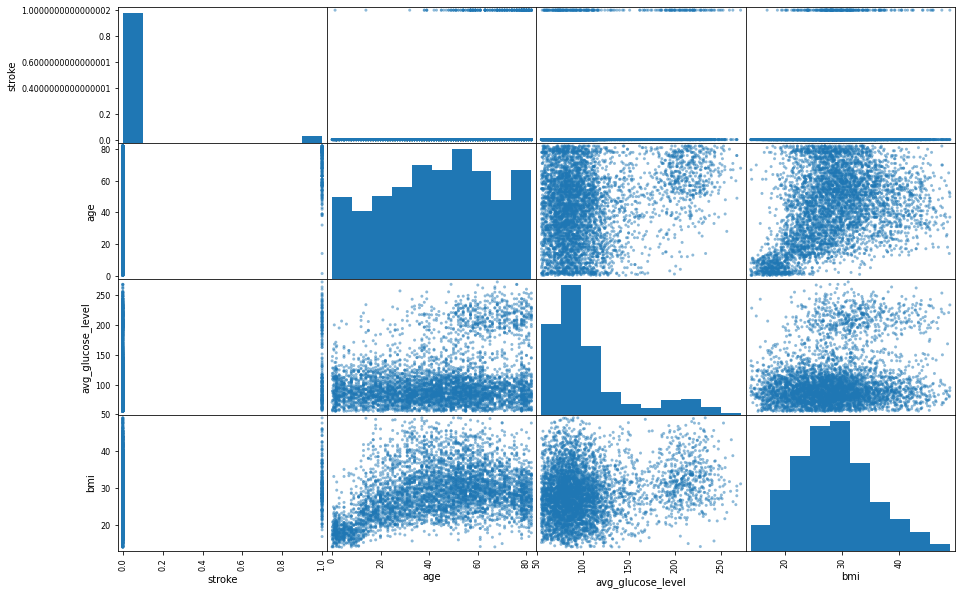

In [15]:
from pandas.plotting import scatter_matrix

attributes = ["stroke", "age", "avg_glucose_level", "bmi"]
scatter_matrix(brain[attributes], figsize=(15, 10))

In [16]:
sample_incomplete_rows = brain[brain.isnull().any(axis=1)]
sample_incomplete_rows  # display rows with missing values

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [17]:
from sklearn.preprocessing import OrdinalEncoder
# sklearn OrdinalEncoder class is used to convert categorical values to numbers
cat_encoder = OrdinalEncoder() 

# Multiple categorical columns
categorical_cols = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

pd.get_dummies(brain, columns=categorical_cols)

#cat_encoder = OneHotEncoder()

brain_cat_enc = cat_encoder.fit_transform(brain[categorical_cols])
brain_cat_enc

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 2.],
       [0., 1., 1., 1., 3.],
       ...,
       [0., 1., 0., 0., 3.],
       [1., 1., 1., 0., 3.],
       [0., 1., 1., 1., 2.]])

In [18]:
#brain_cat_1hot.toarray()

In [19]:
brain.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [20]:
cat_encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Govt_job', 'Private', 'Self-employed', 'children'], dtype=object),
 array(['Rural', 'Urban'], dtype=object),
 array(['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
       dtype=object)]

In [21]:
encoded_data = pd.DataFrame(brain_cat_enc, index=brain.index)
encoded_data
# now concatenate the original data and the encoded data using pandas

,0,1,2,3,4
0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,0.0,2.0
2,0.0,1.0,1.0,1.0,3.0
3,0.0,1.0,2.0,0.0,2.0
4,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
4976,1.0,0.0,1.0,0.0,1.0
4977,1.0,1.0,1.0,1.0,3.0
4978,0.0,1.0,0.0,0.0,3.0
4979,1.0,1.0,1.0,0.0,3.0


In [22]:
#["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
brain["gender"] = encoded_data[0]
brain["ever_married"] = encoded_data[1]
brain["work_type"] = encoded_data[2]
brain["Residence_type"] = encoded_data[3]
brain["smoking_status"] = encoded_data[4]

In [23]:
brain

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1.0,1.0,1.0,228.69,36.6,1.0,1
1,1.0,80.0,0,1,1.0,1.0,0.0,105.92,32.5,2.0,1
2,0.0,49.0,0,0,1.0,1.0,1.0,171.23,34.4,3.0,1
3,0.0,79.0,1,0,1.0,2.0,0.0,174.12,24.0,2.0,1
4,1.0,81.0,0,0,1.0,1.0,1.0,186.21,29.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1.0,41.0,0,0,0.0,1.0,0.0,70.15,29.8,1.0,0
4977,1.0,40.0,0,0,1.0,1.0,1.0,191.15,31.1,3.0,0
4978,0.0,45.0,1,0,1.0,0.0,0.0,95.02,31.8,3.0,0
4979,1.0,40.0,0,0,1.0,1.0,0.0,83.94,30.0,3.0,0


In [24]:
sample_incomplete_rows = brain[brain.isnull().any(axis=1)]
sample_incomplete_rows

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [25]:
corr_matrix = brain.corr()
corr_matrix["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.246478
heart_disease        0.134610
avg_glucose_level    0.133227
hypertension         0.131965
ever_married         0.108398
bmi                  0.056926
smoking_status       0.027463
Residence_type       0.016494
gender               0.008870
work_type           -0.041835
Name: stroke, dtype: float64

In [26]:
brain.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.416382,43.419859,0.096165,0.055210,0.658502,1.302349,0.508332,105.943562,28.498173,1.379442,0.049789
std,0.493008,22.662755,0.294848,0.228412,0.474260,0.860170,0.499981,45.075373,6.790464,1.072180,0.217531
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.230000,23.700000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,1.000000,91.850000,28.100000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,113.860000,32.600000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.740000,48.900000,3.000000,1.000000


In [27]:
#["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
cat_encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Govt_job', 'Private', 'Self-employed', 'children'], dtype=object),
 array(['Rural', 'Urban'], dtype=object),
 array(['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
       dtype=object)]

# WEEK 3 - ATTRIBUTE SELECTION

In [28]:
stroke = brain[brain['stroke'] == 1]
no_stroke = brain[brain['stroke'] == 0]
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1.0,1.0,1.0,228.69,36.6,1.0,1
1,1.0,80.0,0,1,1.0,1.0,0.0,105.92,32.5,2.0,1
2,0.0,49.0,0,0,1.0,1.0,1.0,171.23,34.4,3.0,1
3,0.0,79.0,1,0,1.0,2.0,0.0,174.12,24.0,2.0,1
4,1.0,81.0,0,0,1.0,1.0,1.0,186.21,29.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
4815,1.0,79.0,0,0,1.0,1.0,0.0,114.77,27.2,1.0,1
4816,1.0,74.0,0,0,1.0,1.0,1.0,167.13,28.7,0.0,1
4817,0.0,76.0,1,1,1.0,2.0,1.0,199.86,31.7,3.0,1
4818,1.0,74.0,0,0,1.0,2.0,0.0,60.98,28.1,2.0,1


In [29]:
no_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
208,1.0,3.0,0,0,0.0,3.0,0.0,95.12,18.0,0.0,0
209,1.0,58.0,1,0,1.0,1.0,1.0,87.96,39.2,2.0,0
210,0.0,8.0,0,0,0.0,1.0,1.0,110.89,17.6,0.0,0
211,0.0,70.0,0,0,1.0,1.0,0.0,69.04,35.9,1.0,0
212,0.0,52.0,0,0,1.0,1.0,1.0,77.59,17.7,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
4976,1.0,41.0,0,0,0.0,1.0,0.0,70.15,29.8,1.0,0
4977,1.0,40.0,0,0,1.0,1.0,1.0,191.15,31.1,3.0,0
4978,0.0,45.0,1,0,1.0,0.0,0.0,95.02,31.8,3.0,0
4979,1.0,40.0,0,0,1.0,1.0,0.0,83.94,30.0,3.0,0


In [30]:
stroke.shape

(248, 11)

In [31]:
no_stroke.shape

(4733, 11)

In [32]:
corr_matrix_stroke = stroke.corr()
corr_matrix_stroke["stroke"].sort_values(ascending=False)

gender              NaN
age                 NaN
hypertension        NaN
heart_disease       NaN
ever_married        NaN
work_type           NaN
Residence_type      NaN
avg_glucose_level   NaN
bmi                 NaN
smoking_status      NaN
stroke              NaN
Name: stroke, dtype: float64

In [33]:
corr_matrix_not = no_stroke.corr()
corr_matrix_not["stroke"].sort_values(ascending=False)

gender              NaN
age                 NaN
hypertension        NaN
heart_disease       NaN
ever_married        NaN
work_type           NaN
Residence_type      NaN
avg_glucose_level   NaN
bmi                 NaN
smoking_status      NaN
stroke              NaN
Name: stroke, dtype: float64

In [34]:
corr_matrix_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,0.047243,-0.032055,0.156298,0.117151,-0.008642,-0.012905,0.156492,0.075951,-0.032002,NaN
age,0.047243,1.000000,0.113928,0.152532,0.070908,0.016571,0.003612,0.120962,-0.222714,-0.026134,NaN
hypertension,-0.032055,0.113928,1.000000,0.011453,-0.093196,0.106196,-0.035311,0.092085,0.064112,0.152743,NaN
heart_disease,0.156298,0.152532,0.011453,1.000000,-0.048155,-0.077837,0.029238,0.251208,0.047965,0.105855,NaN
ever_married,0.117151,0.070908,-0.093196,-0.048155,1.000000,-0.015557,-0.131362,0.151826,0.046919,0.022117,NaN
work_type,-0.008642,0.016571,0.106196,-0.077837,-0.015557,1.000000,-0.032982,-0.123514,-0.039118,0.010994,NaN
Residence_type,-0.012905,0.003612,-0.035311,0.029238,-0.131362,-0.032982,1.000000,0.042341,0.067240,-0.029537,NaN
avg_glucose_level,0.156492,0.120962,0.092085,0.251208,0.151826,-0.123514,0.042341,1.000000,0.333822,0.064923,NaN
bmi,0.075951,-0.222714,0.064112,0.047965,0.046919,-0.039118,0.067240,0.333822,1.000000,0.048619,NaN
smoking_status,-0.032002,-0.026134,0.152743,0.105855,0.022117,0.010994,-0.029537,0.064923,0.048619,1.000000,NaN


The above shows up as NaN because there is no change in the value of Stroke no matter any of the values change it doesnt cause any change in the value of stroke, since it is a binary classification.

    age                  0.246478
    heart_disease        0.134610
    avg_glucose_level    0.133227
    hypertension         0.131965
    ever_married         0.108398
    bmi                  0.056926
    smoking_status       0.027463
    Residence_type       0.016494
    gender               0.008870
    work_type           -0.041835

## HANDLING DATA IMBALANCE

UP or DOWN Sample

In [35]:
from sklearn.utils import resample

In [36]:
df_minority = stroke.copy()
df_majority = no_stroke.copy()

#Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=1650)
df_minority_upsampled.shape

(1650, 11)

In [37]:
df_sampled = pd.concat([df_majority, df_minority_upsampled])
df_sampled.reset_index(drop=True, inplace=True)
df_sampled

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,3.00,0,0,0.0,3.0,0.0,95.12,18.0,0.0,0
1,1.0,58.00,1,0,1.0,1.0,1.0,87.96,39.2,2.0,0
2,0.0,8.00,0,0,0.0,1.0,1.0,110.89,17.6,0.0,0
3,0.0,70.00,0,0,1.0,1.0,0.0,69.04,35.9,1.0,0
4,0.0,52.00,0,0,1.0,1.0,1.0,77.59,17.7,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
6378,0.0,74.00,0,0,1.0,1.0,0.0,231.61,34.6,1.0,1
6379,1.0,59.00,0,0,1.0,1.0,1.0,200.62,35.8,1.0,1
6380,0.0,75.00,0,0,1.0,1.0,0.0,199.20,26.6,0.0,1
6381,0.0,1.32,0,0,0.0,3.0,1.0,70.37,18.7,0.0,1


## SPLIT INTO 3 DATASETS

### DATASET 1

In [38]:
Dataset1 = df_sampled[['age', 'avg_glucose_level', 'bmi']].copy()
Dataset1.head()

,age,avg_glucose_level,bmi
0,3.0,95.12,18.0
1,58.0,87.96,39.2
2,8.0,110.89,17.6
3,70.0,69.04,35.9
4,52.0,77.59,17.7


### DATASET 2

In [39]:
Dataset2 = df_sampled[['age', 'heart_disease', 'avg_glucose_level', 'hypertension', 'ever_married']].copy()
Dataset2.head()

,age,heart_disease,avg_glucose_level,hypertension,ever_married
0,3.0,0,95.12,0,0.0
1,58.0,0,87.96,1,1.0
2,8.0,0,110.89,0,0.0
3,70.0,0,69.04,0,1.0
4,52.0,0,77.59,0,1.0


### DATASET 3

In [40]:
Dataset3 = df_sampled[['age', 'heart_disease', 'avg_glucose_level', 'hypertension', 'ever_married', 'bmi', 'smoking_status', 'Residence_type', 'gender', 'work_type']]
Dataset3.head()

,age,heart_disease,avg_glucose_level,hypertension,ever_married,bmi,smoking_status,Residence_type,gender,work_type
0,3.0,0,95.12,0,0.0,18.0,0.0,0.0,1.0,3.0
1,58.0,0,87.96,1,1.0,39.2,2.0,1.0,1.0,1.0
2,8.0,0,110.89,0,0.0,17.6,0.0,1.0,0.0,1.0
3,70.0,0,69.04,0,1.0,35.9,1.0,0.0,0.0,1.0
4,52.0,0,77.59,0,1.0,17.7,1.0,1.0,0.0,1.0


## TRAIN THE MODEL

- SVM
- LogReg
- Decision Trees

In [41]:
# Split the dataset into train and test data
from sklearn.model_selection import train_test_split

# y = brain[['stroke']]
y = df_sampled[['stroke']]

X_train, X_test, y_train, y_test = train_test_split(Dataset3, y, test_size=0.3, random_state=40)
y_ones = 0
for y in y_test["stroke"]:
    
    if y == 1:
        y_ones = y_ones + 1
print(y_ones)

506


In [78]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [43]:
#clf = svm.SVC()
clf = LogisticRegression(random_state=0)

clf.fit(X_train, y_train)

/home/rd2004/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/rd2004/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [44]:
predicted = clf.predict(X_test)

In [45]:
print(metrics.classification_report(y_test, predicted, target_names=['Not Stroke', 'Stroke']))

              precision    recall  f1-score   support

  Not Stroke       0.85      0.88      0.86      1409
      Stroke       0.63      0.55      0.59       506

    accuracy                           0.80      1915
   macro avg       0.74      0.72      0.73      1915
weighted avg       0.79      0.80      0.79      1915



In [46]:
# X_train, X_test, y_train, y_test = train_test_split(Dataset2, y, test_size=0.3, random_state=42)
clf = svm.SVC()

clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, predicted, target_names=['Not Stroke', 'Stroke']))

/home/rd2004/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

  Not Stroke       0.79      0.93      0.85      1409
      Stroke       0.61      0.32      0.42       506

    accuracy                           0.77      1915
   macro avg       0.70      0.62      0.64      1915
weighted avg       0.74      0.77      0.74      1915



In [135]:
X_train, X_test, y_train, y_test = train_test_split(Dataset3, y, test_size=0.6, random_state=42)
clf = DecisionTreeClassifier(max_depth=12, random_state=42)

clf.fit(X_train, y_train)
# plot_tree(clf)
dtree_predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, dtree_predicted, target_names=['Not Stroke', 'Stroke']))

              precision    recall  f1-score   support

  Not Stroke       0.97      0.90      0.93      2848
      Stroke       0.75      0.92      0.83       982

    accuracy                           0.90      3830
   macro avg       0.86      0.91      0.88      3830
weighted avg       0.92      0.90      0.91      3830



In [136]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=10)
scores

array([0.8828125 , 0.8828125 , 0.8828125 , 0.87843137, 0.8627451 ,
       0.89019608, 0.90588235, 0.89019608, 0.91764706, 0.92941176])

In [130]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2,100) }

gd = GridSearchCV(clf, parameters)
gd.fit(X_train, y_train)

print(gd.best_params_)

{'max_depth': 12}


In [117]:
dtree_predicted = gd.predict(X_test)
print(metrics.classification_report(y_test, dtree_predicted, target_names=['Not Stroke', 'Stroke']))
dtree_predicted

              precision    recall  f1-score   support

  Not Stroke       0.98      0.91      0.95      2848
      Stroke       0.79      0.96      0.86       982

    accuracy                           0.92      3830
   macro avg       0.89      0.93      0.90      3830
weighted avg       0.93      0.92      0.92      3830



array([0, 1, 1, ..., 0, 1, 0])

In [105]:
clf = LinearSVC(random_state=0, tol=1e-5)

clf.fit(X_train, y_train)
svc_predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, svc_predicted, target_names=['Not Stroke', 'Stroke']))
svc_predicted

/home/rd2004/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

  Not Stroke       0.92      0.74      0.82      1425
      Stroke       0.52      0.82      0.64       490

    accuracy                           0.76      1915
   macro avg       0.72      0.78      0.73      1915
weighted avg       0.82      0.76      0.77      1915



/home/rd2004/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([0, 1, 1, ..., 0, 1, 0])

### Random Forest

In [49]:
rnd_forest_clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0)

rnd_forest_clf.fit(X_train, y_train)
rnd_predicted = rnd_forest_clf.predict(X_test)
print(metrics.classification_report(y_test, rnd_predicted, target_names=['Not Stroke', 'Stroke']))
rnd_predicted

<ipython-input-49-5b880e19c2ee>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_forest_clf.fit(X_train, y_train)


              precision    recall  f1-score   support

  Not Stroke       1.00      0.98      0.99      1409
      Stroke       0.95      1.00      0.97       506

    accuracy                           0.98      1915
   macro avg       0.97      0.99      0.98      1915
weighted avg       0.98      0.98      0.98      1915



array([0, 0, 0, ..., 1, 0, 1])

### Naive Bayes

In [50]:
from sklearn.naive_bayes import MultinomialNB

bayes_clf_multinomial = MultinomialNB(alpha=0.0, class_prior=[0.4, 0.6])
bayes_clf_multinomial.fit(X_train, y_train)
bayes_mn_predicted = bayes_clf_multinomial.predict(X_test)
print(metrics.classification_report(y_test, bayes_mn_predicted, target_names=['Not Stroke', 'Stroke']))
bayes_mn_predicted

              precision    recall  f1-score   support

  Not Stroke       0.88      0.62      0.73      1409
      Stroke       0.42      0.77      0.55       506

    accuracy                           0.66      1915
   macro avg       0.65      0.70      0.64      1915
weighted avg       0.76      0.66      0.68      1915



/home/rd2004/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/rd2004/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


array([1, 1, 0, ..., 1, 0, 1])

In [51]:
from sklearn.naive_bayes import GaussianNB

bayes_clf_gaussian = GaussianNB()
bayes_clf_gaussian.fit(X_train, y_train)
bayes_gaus_predicted = bayes_clf_gaussian.predict(X_test)
print(metrics.classification_report(y_test, bayes_gaus_predicted, target_names=['Not Stroke', 'Stroke']))
bayes_gaus_predicted

              precision    recall  f1-score   support

  Not Stroke       0.84      0.83      0.84      1409
      Stroke       0.54      0.58      0.56       506

    accuracy                           0.76      1915
   macro avg       0.69      0.70      0.70      1915
weighted avg       0.76      0.76      0.76      1915



/home/rd2004/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0, 0, 0, ..., 0, 0, 0])

In [52]:
from sklearn.naive_bayes import ComplementNB

bayes_clf_complement = ComplementNB()
bayes_clf_complement.fit(X_train, y_train)
cnb_predicted = bayes_clf_complement.predict(X_test)
print(metrics.classification_report(y_test, cnb_predicted, target_names=['Not Stroke', 'Stroke']))
cnb_predicted

              precision    recall  f1-score   support

  Not Stroke       0.88      0.65      0.75      1409
      Stroke       0.44      0.76      0.56       506

    accuracy                           0.68      1915
   macro avg       0.66      0.71      0.65      1915
weighted avg       0.77      0.68      0.70      1915



/home/rd2004/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([1, 1, 0, ..., 1, 0, 1])

In [53]:
from sklearn.naive_bayes import BernoulliNB

bayes_clf_bnb = BernoulliNB()
bayes_clf_bnb.fit(X_train, y_train)
bnb_predicted = bayes_clf_bnb.predict(X_test)
print(metrics.classification_report(y_test, bnb_predicted, target_names=['Not Stroke', 'Stroke']))
bnb_predicted

              precision    recall  f1-score   support

  Not Stroke       0.79      0.89      0.84      1409
      Stroke       0.53      0.33      0.41       506

    accuracy                           0.74      1915
   macro avg       0.66      0.61      0.62      1915
weighted avg       0.72      0.74      0.72      1915



/home/rd2004/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0, 0, 0, ..., 0, 0, 0])

In [54]:
from sklearn.naive_bayes import CategoricalNB

bayes_clf_cnb = CategoricalNB()
bayes_clf_cnb.fit(X_train, y_train)
cnb_predicted = bayes_clf_cnb.predict(X_test)
print(metrics.classification_report(y_test, cnb_predicted, target_names=['Not Stroke', 'Stroke']))
cnb_predicted

              precision    recall  f1-score   support

  Not Stroke       0.89      0.84      0.86      1409
      Stroke       0.62      0.71      0.66       506

    accuracy                           0.81      1915
   macro avg       0.75      0.77      0.76      1915
weighted avg       0.82      0.81      0.81      1915



/home/rd2004/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0, 1, 0, ..., 0, 0, 0])

## Confusion Matrix

<div>
<img src="https://miro.medium.com/max/1051/1*fxiTNIgOyvAombPJx5KGeA.png" alt="Confusion Matrix" style="width: 400px;"/>
</div

In [55]:
from numpy import cross
from sklearn.model_selection import cross_val_predict

# y_train_pred = cross_val_predict(rnd_forest_clf, X_train, y_train)
y_train_pred = cross_val_predict(bayes_clf_cnb, X_train, y_train)

/home/rd2004/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/rd2004/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/rd2004/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/rd2004/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [56]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[2786,  538],
       [ 324,  820]])

In [57]:
# specificity = tn / n = tn / (tn + fp)
tn = 801
fp = 544

specificity = tn / (tn + fp)
print("Specificity:", specificity)

Specificity: 0.5955390334572491


### Precision and Recall Score

In [58]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
print("Precision:", precision)

print("Sensitivity/Recall", recall)

Precision: 0.6038291605301914
Sensitivity/Recall 0.7167832167832168


In [59]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.6554756195043965

### ROC CURVE

In [60]:
# y_scores = rnd_predicted
y_scores = cnb_predicted
y_scores

array([0, 1, 0, ..., 0, 0, 0])

In [61]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_scores, drop_intermediate=False)
thresholds

array([2, 1, 0])

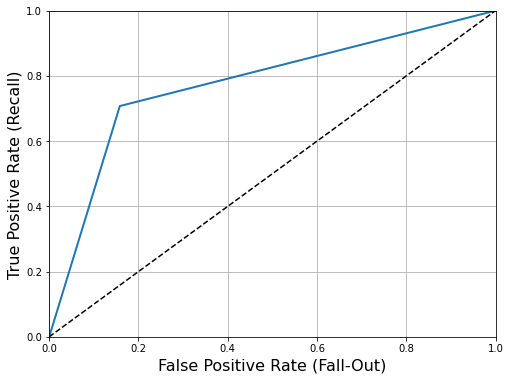

In [62]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
# plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
# plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
# plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [63]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_scores)

0.7746208030251601

## WEEK 7 - K-means Clustering

In [64]:
X = Dataset1.copy()
y = df_sampled[['stroke']]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

# cat_cols = df_sampled[["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]]
# principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
# cat_cols

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

XP = pd.DataFrame(data = principalComponents , columns = ['pc1', 'pc2'])

X_train, X_test, y_train, y_test = train_test_split(XP, y, test_size=0.3, random_state=40)


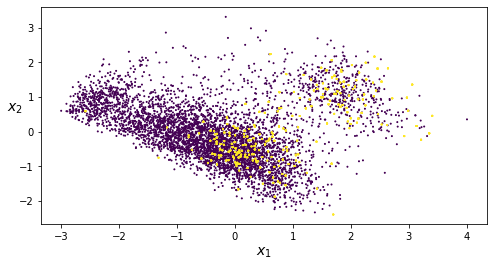

In [67]:

def plot_clusters(X, y=None):
    plt.scatter(X['pc1'], X['pc2'], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(8, 4))
plot_clusters(XP,y['stroke'])
plt.show()

In [68]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=50, max_iter=1000, random_state=42)
kmeans.fit(X_train)
k_pred = kmeans.fit_predict(X_test)

print(metrics.classification_report(y_test, k_pred, target_names=['Not Stroke', 'Stroke']))
k_pred

              precision    recall  f1-score   support

  Not Stroke       0.48      0.13      0.20      1409
      Stroke       0.20      0.62      0.31       506

    accuracy                           0.26      1915
   macro avg       0.34      0.37      0.25      1915
weighted avg       0.41      0.26      0.23      1915



array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [69]:
kmeans.cluster_centers_

array([[ 1.77691812,  0.97990585],
       [-0.42643764, -0.23928908]])

In [70]:
def plot_data(X):
    plt.plot(X['pc1'], X['pc2'], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=10,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=8, linewidths=8,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

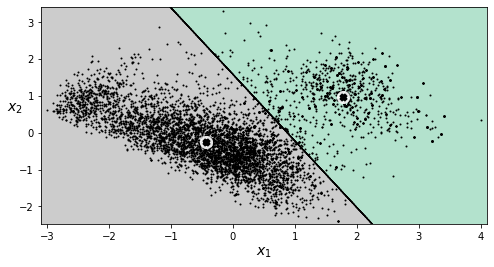

In [71]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, XP)
plt.show()

In [72]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[10390.37573041371,
 6024.887194054104,
 2887.12231232336,
 2154.647527830103,
 1798.4056766854933,
 1527.430433934998,
 1303.3801204265571,
 1167.5995715272802,
 1041.2392646683206]

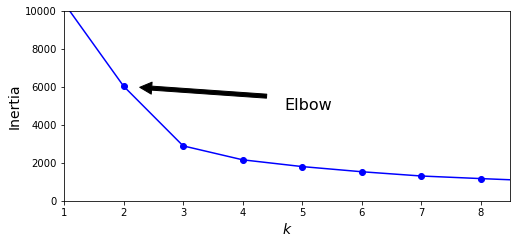

In [73]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 10000])
plt.show()

### COMPARE WITH Naive Bayes